In [1]:
# T_theta = 125 # ms, theta osicillation period
A_STDP = 0.03; s_STDP = 4 # parameters for STDP
omega = lambda dx: A_STDP * np.exp(s_STDP*np.cos(dx)) * np.sin(dx) # gabor as STDP rule
domega = lambda dx: A_STDP * np.exp(s_STDP*np.cos(dx)) * (np.cos(dx) - s_STDP*np.sin(dx)**2) # derivative of STDP in respect to xi (postsynaptic)
# plot STDP and PCF
# u = np.arange(-np.pi,np.pi,np.pi/120)
# plt.plot(u,omega(u))
# plt.plot(u,domega(u))
# plt.plot(u,domega(u)*omega(u))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import solve_ivp


In [3]:
def mainode(t,x):
    # global variables:
    # N is number of neurons
    # Wij is the synpatic efficancy from neuron j to i
    # sigma2_w is the variance of W
    # x_tilde is the recall cue
    # k_{prior,noise} is the concentration of prior and 
    # cue distribution
    # phase, dynamically updated at each event
    H = np.zeros((N,N))
    for j in range(N):
        dxij = x-x[j] # phase difference between neurons
        H[:,j] = W[:,j] * domega(dxij) # phase interaction
                                        # from neuron j
                                        # to neuron i
                                        # Hjj is guarenteed
                                        # to be 0 because
                                        # Wjj is 0
    dx_prior    = -k_prior * np.sin(x) 
    dx_external = -k_noise * np.sin(x-x_tilde)
    dx_synapse  = np.sum(H,1)/sigma2_w # sum_j H_{ij}/sigma_w^2
    return dx_prior + dx_external + dx_synapse


In [4]:
N = 200	# number of neurons
event = [lambda t,x,j=j: np.sin((x[j]-t)/2) for j in range(N)]      
        # event[i](t,x)
        # equals 0 when firing phase
        # of neuron i matches current LFP 
        # i.e. (x[i]-t) mod 2pi ==0   
        # syntax: j=j freeze j google "python define list of function"                              

In [5]:
N = N	# number of neurons
M = 10	# number of memories
k_prior = 0.5	# von Mises concentration parameter
                # for prior distribution
k_noise = 10	# for cue distribution
x_memory = np.random.vonmises(0,k_prior,(N,M)) # every column 
                                        # is a memory trace
W = np.zeros((N,N))
for i in range(N):
    for j in range(i): # j<i, Wii = 0
        for k in range(M): # the STDP rule is additive
            W[i,j] += omega(x_memory[i,k]-x_memory[j,k])
            W[j,i] += omega(x_memory[j,k]-x_memory[i,k])
W_flatten = [W[i][j] for i in range(N) for j in range(i) ]
sigma2_w = np.var(W_flatten)
# plt.hist(W_flatten,50)

In [6]:
kk=0
x_target = x_memory[:,kk].copy()     # the kk'th one is 
                                    # what we want to recall
x_0 = x_target # np.random.vonmises(0,k_prior,N) # random initial state
x_noise = np.random.vonmises(0,k_noise,N)   # indepedent random
                                # noise to corrupt the cue
x_tilde = x_target # x_target + x_noise 

# x_fire = [[ ] for j in range(N)] # record firing phase


In [7]:
print(not np.any(np.diag(W)))
i,j = np.random.randint(0,N,2)
print(W[i,j] + W[j,i] == 0)

True
True


In [8]:
for func in event: 
        func.terminal = False # continue integration when neuron fires
# first round
tf = 2*np.pi # end of simulation, unit in LFP phase
sol = solve_ivp(mainode,(0,tf),x_0,events=event) # integrate
                                # until the end
t = sol.t; tNow = t[-1]         # record time
x = sol.y; xNow = x[:,-1]       # state
x_fire = sol.t_events
print(sol.message)
print(tNow)
# print(len(xNow))

The solver successfully reached the end of the integration interval.
6.283185307179586


Text(0, 0.5, 'counts')

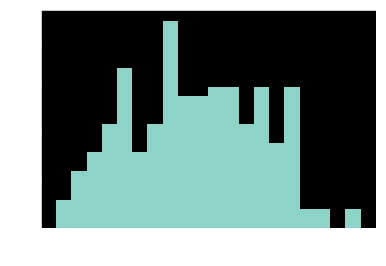

In [9]:
finalPhase = [ x_fire[i][-1] for i in range(N) ]
errors = np.array(finalPhase) - x_target
errors = np.mod(errors+np.pi,2*np.pi)-np.pi
plt.hist(errors,20)
plt.xlabel('errors')
plt.ylabel('counts')

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import numpy as np
from numpy import pi,exp,sin,cos
import matplotlib.pyplot as plt

In [12]:
## Define STDP and Phase coupling function
A_STDP = 0.03
s_STDP = 4
T_theta = 125 # theta oscillation period in ms
dp = lambda dt: dt*2*pi/T_theta
omega = lambda dx: A_STDP * exp(s_STDP*cos(dx)) * sin(dx)
domega = lambda dx: 2*pi/T_theta*A_STDP*exp(s_STDP*cos(dx)) * (cos(dx) - s_STDP * sin(dx)**2 )


In [13]:
import numpy as np
from numpy import pi,exp,sin,cos
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [14]:
## Define STDP and Phase coupling function
A_STDP = 0.03
s_STDP = 4
T_theta = 125 # theta oscillation period in ms
dp = lambda dt: dt*2*pi/T_theta # dt = xi - xj
omega = lambda dx: A_STDP * exp(s_STDP*cos(dx)) * sin(dx)
# derivative in respect to xi
domega = lambda dx: 2*pi/T_theta*A_STDP*exp(s_STDP*cos(dx)) * (cos(dx) - s_STDP * sin(dx)**2 )


In [15]:
## Create Memorys
N = 200 # number of neurons
M = 10 # number of memorys
k_prior = 0.5 # concentration parameter for prior distribution
k_cue = 10 # for cue distribution
xMemory = np.random.vonmises(0,k_prior,(N,M))
## Create Synapses
W = np.zeros((N,N))
for i in range(N):
    for j in range(i): # 0<=j<i
        for k in range(M):
            W[i,j] += omega(xMemory[i,k]-xMemory[j,k])
            W[j,i] += omega(xMemory[j,k]-xMemory[i,k])
sigma2_W = np.var(W.flatten())


In [16]:
## Define ODE
def mainode(t,x,N,W,sigma2_W,x_tilde,k_prior,k_cue):
    # Additional parameters
    # N: #neurons
    # W: Synpatic weight W[i,j] is from j to i
    # sigma2_W: variance of W
    # x_tilde is the recall cue
    # Calculate phase response H
    H = np.zeros(N)
    for i in range(N):
        dxi = x[i] - x # dxi[j] = x[i] - x[j]
        H[i] = np.dot( W[i,:], domega(dxi) ) # H[i] = \sum_j W_{ij} * domega(xi-xj)
    #
    dx_prior    = -k_prior * sin(x)
    dx_external = -k_cue * sin(x-x_tilde)
    dx_synapse  = H/sigma2_W
    dx = dx_prior + dx_external + dx_synapse
    return dx

In [17]:
## Solve ODE
# Initial Condintion
k = 0 # memory to recall
xTarget = xMemory[:,k]
x0 = xTarget.copy()
xNoise = np.random.vonmises(0,k_cue,N)
x_tilde = xTarget + xNoise

# Define firing events
events = [lambda t,x,j=j: sin((x[i] - 2*pi*t/T_theta)/2) for j in range(N)]
# events[i] = 0 if and only if x[i] == 2*pi*t/T mod 2pi

# Integration
tf = 2*pi
kwargs = {
    'N': N,
    'W': W,
    'k_prior': k_prior,
    'k_cue': k_cue,
    'sigma2_W': sigma2_W,
    'x_tilde': x_tilde
}
sol = solve_ivp(lambda t,y: mainode(t,y,**kwargs),(0,tf),x0,events=events)
t   = sol.t; tNow = sol.t[-1]
x_t = sol.y; xNow = sol.y[:,-1]
t_fire = sol.t_events
x_fire = np.mod(t_fire/T_theta,1)*2*pi
print(sol.message)


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [19]:
## Solve ODE
# Initial Condintion
k = 0 # memory to recall
xTarget = xMemory[:,k]
x0 = xTarget.copy()
xNoise = np.random.vonmises(0,k_cue,N)
x_tilde = xTarget + xNoise

# Define firing events
events = [lambda t,x,j=j: sin((x[i] - 2*pi*t/T_theta)/2) for j in range(N)]
# events[i] = 0 if and only if x[i] == 2*pi*t/T mod 2pi

# Integration
tf = 2*pi
kwargs = {
    'N': N,
    'W': W,
    'k_prior': k_prior,
    'k_cue': k_cue,
    'sigma2_W': sigma2_W,
    'x_tilde': x_tilde
}
sol = solve_ivp(lambda t,y: mainode(t,y,**kwargs),(0,tf),x0,events=events)
t   = sol.t; tNow = sol.t[-1]
x_t = sol.y; xNow = sol.y[:,-1]
t_fire = sol.t_events
x_fire = [np.mod(ts/T_theta,1)*2*pi for ts in t_fire]
print(sol.message)


The solver successfully reached the end of the integration interval.


Text(0, 0.5, 'counts')

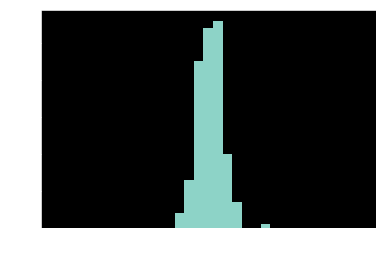

In [22]:
## evaluate errors
errors = xNow - xTarget
errors = np.mod(errors+pi,2*pi)-pi
h=plt.hist(errors)
plt.xlim((-pi,pi))
plt.xlabel('error')
plt.ylabel('counts')

The solver successfully reached the end of the integration interval.


Text(0, 0.5, 'counts')

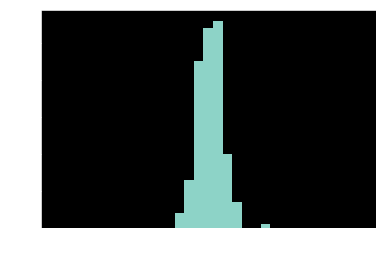

In [23]:
# Integration
tf += 20*pi
kwargs = {
    'N': N,
    'W': W,
    'k_prior': k_prior,
    'k_cue': k_cue,
    'sigma2_W': sigma2_W,
    'x_tilde': x_tilde
}
sol = solve_ivp(lambda t,y: mainode(t,y,**kwargs),(tNow,tf),xNow,events=events)
t   = sol.t; tNow = sol.t[-1]
x_t = sol.y; xNow = sol.y[:,-1]
t_fire = sol.t_events
x_fire = [np.mod(ts/T_theta,1)*2*pi for ts in t_fire]
print(sol.message)

## evaluate errors
errors = xNow - xTarget
errors = np.mod(errors+pi,2*pi)-pi
h=plt.hist(errors)
plt.xlim((-pi,pi))
plt.xlabel('error')
plt.ylabel('counts')

The solver successfully reached the end of the integration interval.


Text(0, 0.5, 'counts')

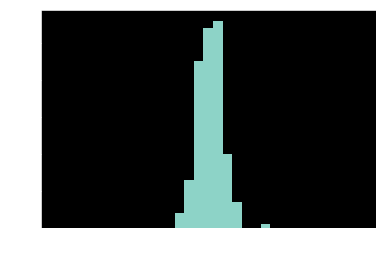

In [24]:
# Integration
tf += 20*pi
kwargs = {
    'N': N,
    'W': W,
    'k_prior': k_prior,
    'k_cue': k_cue,
    'sigma2_W': sigma2_W,
    'x_tilde': x_tilde
}
sol = solve_ivp(lambda t,y: mainode(t,y,**kwargs),(tNow,tf),xNow,events=events)
t   = sol.t; tNow = sol.t[-1]
x_t = sol.y; xNow = sol.y[:,-1]
t_fire = sol.t_events
x_fire = [np.mod(ts/T_theta,1)*2*pi for ts in t_fire]
print(sol.message)

## evaluate errors
errors = xNow - xTarget
errors = np.mod(errors+pi,2*pi)-pi
h=plt.hist(errors)
plt.xlim((-pi,pi))
plt.xlabel('error')
plt.ylabel('counts')
